# Проектная работа 3
# Анализ программы лояльности магазина «Строили, строили и наконец построили»

# Описание проекта

    Менеджер проекта, отвечающий за программу лояльности, хочет оценить результаты внедрения программы лояльности, понять насколько сработала программа лояльности, стоит ли ее использовать дальше.
    Для него требуется проверить повышаются ли основные показатели у клиентов, входящих в программу лояльности.
    Исследование будет проводиться на основе предоставленного датасета за весь период предоставленных данных.
    Подобное исследование проводится впервые, поэтому требуется максимально изложить как работают решения.
    Результатом исследование является оценка программы лояльности, действительно ли она показывает ожидаемый рост среднего чека и количества продуктов в покупательской корзине.
    Задачами проекта являются: 
- проведение исследовательского анализа данных для понимания общей картины,
- получение основных ритейл-метрик по когортам у клиентов внутри программы лояльности и вне ее,
- анализ эффективности текущей программы лояльности,
- предложение способов повышения эффективности, обоснование использования других программ лояльности в случае не эффективности программы,
- определение клиентовк подключению к программе лояльности в первую очередь в случае ее эффективности,
- проверка гипотезы.

    Результыты необходимо предоставить в виде:
- тетради JupyterNotebook со всеми расчетами, выводами и пояснениеями результатов,
- презентации для продуктового менеджера, рассчитанной на небольшое сообщение  - пять -семь минут и содержащей ответы на главные вопросы,
- дашборд, иллюстрирующий пример отчета, который может быть автоматизирован и использован как часть функционала системы.


# Описание данных 

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;



## Ход работы

### Шаг 1. Открытие файл с данными и изучение общей информации.

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
# импортируем функции для работы со временем
from datetime import datetime, timedelta
import scipy.stats as stats

In [2]:
# загрузим данные 1го файла
df = pd.read_csv('/datasets/retail_dataset.csv')

In [3]:
# посмотрим первые 5 строк 1го файла
pd.set_option('display.max_colwidth', 300)
display(df.head())

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [4]:
# загрузим данные 2го файла
df2 = pd.read_csv('/datasets/product_codes.csv')

In [5]:
# посмотрим первые 5 строк 2го файла
pd.set_option('display.max_colwidth', 300)
display(df2.head())

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [6]:
# выведем основную информацию о первом файле

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [7]:
# Исправим тип в столбце purchasedate :
df['purchasedate'] = df['purchasedate'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_ID          105335 non-null  object        
 2   Quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   CustomerID       69125 non-null   float64       
 5   ShopID           105335 non-null  object        
 6   loyalty_program  105335 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.6+ MB


In [8]:
# выведем основную информацию о втором файле

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [9]:
# проверим пропуски в первом файле
df.isna().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
ShopID                 0
loyalty_program        0
dtype: int64

In [10]:
# определили процент пропусков в столбцах в первом файле
(
    (df.isna().mean()*100)
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns = {0:'percent_space'})
    .style.background_gradient('coolwarm').format("{:.1f}")
)

,percent_space
CustomerID,34.4
purchaseid,0.0
item_ID,0.0
Quantity,0.0
purchasedate,0.0
ShopID,0.0
loyalty_program,0.0


In [11]:
# посмотрим строки с пропуском данных о покупателях в первом файле
df[df['CustomerID'].isna()]

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0.0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0.0
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0.0
16,539744,22300,5,2016-12-21 15:21:00,NaN,Shop 0,0.0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,Shop 0,0.0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,Shop 0,0.0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,Shop 0,0.0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,Shop 0,0.0


In [12]:
# проверим пропуски во втором файле
df2.isna().sum()

productID        0
price_per_one    0
dtype: int64

1. В файле retail_dataset.csv отсутствуеи 34% данных об идентификаторе покупателя. Удалить такое количество нельзя, есть предположение (проверим позже), что это покупатели не участвующие в программе лояльности. Во втором файле пропусков нет.
2. Для удобства нам так же нужно переименовать столбцы.

### Шаг 2. Предобработка  данных

In [13]:
# переименуем столбцы в первом файле

df = df.rename(columns = {'purchaseid':'purchase', 'item_ID':'item', 'Quantity':'quantity','purchasedate':'date','CustomerID':'customer','ShopID':'shop'})
df

,purchase,item,quantity,date,customer,shop,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0
...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0.0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0.0
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1.0
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0.0


In [14]:
# переименуем столбцы

df2 = df2.rename(columns = {'price_per_one':'price', 'productID':'item'})
df2

,item,price
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
...,...,...
9964,84306,8.29
9965,90001A,4.15
9966,90118,2.46
9967,DOT,172.62


In [15]:
# посмотрим сколько разных цен у одного товара
print(df2['item'].value_counts())
# мы видим от 1 до 174 разных цен на один товар

DOT       174
M          59
S          29
POST       15
D          13
         ... 
46115B      1
90137       1
79051A      1
90179A      1
84536b      1
Name: item, Length: 3159, dtype: int64


In [16]:
df2[df2['item']=='DOT'].describe()


,price
count,174.000000
mean,278.734425
std,213.983878
min,2.510000
25%,140.715000
50%,198.190000
75%,336.462500
max,950.990000


In [17]:
df2[df2['item']=='21873'].describe()

,price
count,7.00000
mean,1.81000
std,1.11475
min,0.42000
25%,1.15500
50%,1.63000
75%,2.47500
max,3.36000


Если посмотреть по DOT мы уыидем разброс цент от 2.51 до 950.99, по 21783 от 0,42 до 3,36. Очень неоднородые м масштабные колебания, чтобы брато среднюю, вощьмем медианну

In [18]:
df2.groupby('item').agg({'price':'nunique'}).query('price>1').count()

price    2494
dtype: int64

Как мы видим из 3159 позиций у 2494 позиций более одной цены

In [19]:
# проверим наличие дубликатов.
display(f' Всего явных дубликатов {df.duplicated().sum()}') 
df[df.duplicated()]


' Всего явных дубликатов 1033'

,purchase,item,quantity,date,customer,shop,loyalty_program
5345,537265,21499,24,2016-12-06 11:26:00,21598.0,Shop 0,0.0
5863,540803,21485,0,2017-01-11 12:30:00,20348.0,Shop 0,0.0
6893,540524,21326,11,2017-01-09 12:53:00,22414.0,Shop 0,1.0
7821,537192,22585,0,2016-12-05 13:42:00,22081.0,Shop 0,1.0
10806,537772,22080,4,2016-12-08 12:35:00,23722.0,Shop 0,1.0
...,...,...,...,...,...,...,...
105164,542224,22178,5,2017-01-26 12:45:00,23567.0,Shop 0,1.0
105173,544153,82552,1,2017-02-16 12:11:00,21035.0,Shop 0,0.0
105178,540839,21123,0,2017-01-11 15:42:00,22470.0,Shop 0,1.0
105229,543277,21533,0,2017-02-06 14:33:00,21487.0,Shop 0,0.0


In [20]:
# проверим наличие дубликатов.
display(f' Всего явных дубликатов {df2.duplicated().sum()}') 
df2[df2.duplicated()]

' Всего явных дубликатов 0'

,item,price


In [21]:
# удалим все явные дубликаты, 

data = df.drop_duplicates().reset_index(drop=True)

In [22]:
print(f' Всего было удалено  {df.shape[0]-data.shape[0]}, что составляет {round((df.shape[0]-data.shape[0])/data.shape[0]*100,2)} процентов от первоначального количества')

 Всего было удалено  1033, что составляет 0.99 процентов от первоначального количества


Менее 1% - допустимое удаление

In [23]:
# в столбце с данными о покупателях заменим пропуски на 0, та как пропусков много, удалять нельзя.
data['customer'] = data['customer'].fillna(0)

In [24]:
# проверим есть ли у нас покупатели, которые участвуют и не участвуют в программе лояльности

data.groupby('customer').agg({'loyalty_program':'nunique'}).query('loyalty_program>1').count()

# как мы видим таковых нет

loyalty_program    0
dtype: int64

In [25]:
# сгруппируем по количеству данных по программам лояльности 
print(data['loyalty_program'].value_counts())

# Как видим в у нас большая часть покупок совершается учатниками, не входящими в программу лояльности

0.0    80890
1.0    23412
Name: loyalty_program, dtype: int64


In [26]:
# проверим есть ли у нас покупатели, которые покупают в разных магазинах

data.groupby('customer').agg({'shop':'nunique'}).query('shop>1').count()

# как мы видим таких всего 3 - слишком мало, чтобы рассматривать это как дополнительный фактор

shop    3
dtype: int64

In [27]:
# посмотрим сколько покупок совершал каждый клиент

data['customer'].value_counts()

# как мы видим не иденцифицированные пользователи совершили 36 148 покупок, иденцифицированные покупатели максимум - 774, минимум - 1

0.0        36148
18427.0      774
23520.0      751
20285.0      745
20990.0      715
           ...  
21269.0        1
23912.0        1
22272.0        1
19093.0        1
18182.0        1
Name: customer, Length: 1750, dtype: int64

In [28]:
# посмотрим общую информацию. как мы видим эта информация не дает нам общего понимания, но мы виим, что в файле кроме продаж скорей всего были и возвраты, которые отражаются с минусовым значение.
print(data.describe())
print(df2.describe())

            quantity       customer  loyalty_program
count  104302.000000  104302.000000    104302.000000
mean        7.883003   13729.314874         0.224464
std       329.565540   10100.257229         0.417231
min    -74216.000000       0.000000         0.000000
25%         0.000000       0.000000         0.000000
50%         2.000000   19423.000000         0.000000
75%         7.000000   21692.000000         0.000000
max     74214.000000   23962.000000         1.000000
              price
count   9969.000000
mean      19.503697
std      330.880754
min        0.000000
25%        1.250000
50%        2.550000
75%        5.510000
max    16888.020000


In [29]:
# посмотрим сколько пользователей по каждому магазину
data['shop'].value_counts()

Shop 0     96370
Shop 4      1739
Shop 1      1540
Shop 6      1030
Shop 8       560
Shop 3       492
Shop 7       312
Shop 10      299
Shop 12      278
Shop 18      255
Shop 2       252
Shop 5       179
Shop 11      169
Shop 14      154
Shop 19       74
Shop 9        61
Shop 15       60
Shop 16       59
Shop 26       56
Shop 25       53
Shop 27       45
Shop 17       40
Shop 22       40
Shop 13       35
Shop 21       32
Shop 24       32
Shop 20       30
Shop 28       30
Shop 30       15
Shop 29        9
Shop 23        2
Name: shop, dtype: int64

In [30]:
data['purchase'].value_counts()

537434     675
538071     651
538349     613
537638     601
537237     597
          ... 
C543772      1
538041       1
C540057      1
538175       1
541407       1
Name: purchase, Length: 4894, dtype: int64

In [31]:
# посмотрим сколько пользователей поподают в каждую группу эксперимента

data['loyalty_program'].value_counts()

0.0    80890
1.0    23412
Name: loyalty_program, dtype: int64

In [32]:
data.groupby('loyalty_program')['customer'].nunique()

loyalty_program
0.0    1163
1.0     587
Name: customer, dtype: int64

__Как мы видим у нас учатвует в программе 587 пользователей, которые сделали 23412 операций, а не участвует - 1162 пользователей,которые совершили 80890 операций и 36210 из них совершено неавторизированными пользователями.

In [33]:
# посчитаем медианные значения цены

df2_grouped = df2.groupby(['item'])['price'].median().reset_index()
print(df2_grouped)

              item   price
0            10002   1.630
1            10080   0.850
2            10120   0.210
3           10123C   0.650
4           10124A   0.420
...            ...     ...
3154  gift_0001_20  16.845
3155  gift_0001_30  25.265
3156  gift_0001_40  34.040
3157  gift_0001_50  42.550
3158             m   2.550

[3159 rows x 2 columns]


In [34]:
# добавим в основную таблицу медианное значение цены и посчитаем выручку

data_final=data.merge(df2_grouped,on='item',how='left')
data_final['sales']= data_final['quantity']*data_final['price']
data_final['day'] = data_final['date'].dt.date.astype('datetime64')
display(data_final)

,purchase,item,quantity,date,customer,shop,loyalty_program,price,sales,day
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.630,17.93,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0,3.290,0.00,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0,1.630,11.41,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0,4.370,0.00,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0,5.750,0.00,2017-02-13
...,...,...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,0.0,Shop 0,0.0,2.460,2.46,2016-12-13
104298,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0.0,9.335,0.00,2017-01-05
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1.0,8.330,8.33,2016-12-09
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0.0,0.830,9.13,2016-12-10


In [35]:
# Проверим за какой период предоставлены данные эксперимента (найдем максимальную и минимальную даты):
print(f"Период, за который имеются данные: с {data_final['date'].min()} по {data_final['date'].max()}")
print(f"или {data_final['date'].max() - data_final['date'].min()}")

Период, за который имеются данные: с 2016-12-01 08:26:00 по 2017-02-28 17:04:00
или 89 days 08:38:00


In [36]:
data_final_grouped = data_final.groupby(['purchase','customer','day','shop']).agg({'quantity':'sum', 'sales':'sum','loyalty_program':'median'}).reset_index()#.sort_values(by='name', ascending=False)

display(data_final_grouped)

,purchase,customer,day,shop,quantity,sales,loyalty_program
0,536365,23529.0,2016-12-01,Shop 0,33,186.515,1.0
1,536366,23529.0,2016-12-01,Shop 0,10,19.750,1.0
2,536367,18726.0,2016-12-01,Shop 0,71,285.395,0.0
3,536368,18726.0,2016-12-01,Shop 0,11,96.090,0.0
4,536369,18726.0,2016-12-01,Shop 0,2,13.200,0.0
...,...,...,...,...,...,...,...
4889,C545003,23910.0,2017-02-25,Shop 0,-15,-32.455,1.0
4890,C545033,19835.0,2017-02-25,Shop 6,-678,-4497.495,0.0
4891,C545040,19363.0,2017-02-27,Shop 0,-2,-11.820,0.0
4892,C545068,19836.0,2017-02-27,Shop 0,-12,-35.400,0.0


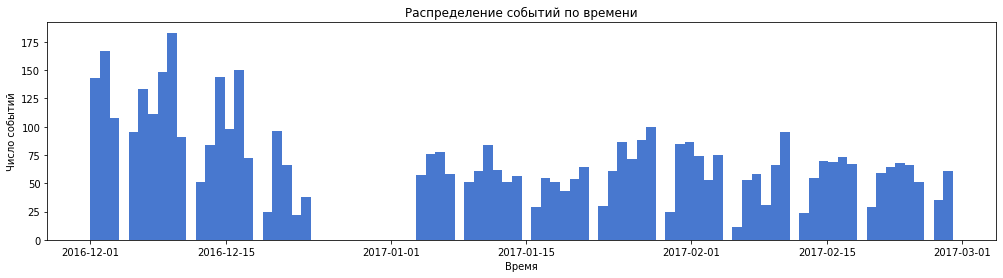

In [37]:
# построим гистограмму по дате и времени
plt.figure(figsize=(17,4))
plt.style.use('seaborn-muted')
plt.hist(data_final_grouped['day'], bins=90)
plt.xlabel('Время')
plt.ylabel('Число событий')
plt.rcParams['axes.grid'] = True
#plt.rcParams['grid.alpha'] = 0.6
plt.title('Распределение событий по времени')
plt.show()

На графике видно отсутствие продаж в период в последнюю неделю декабря и первые дни января, а так же цикличные колебания. Мы будем это анализировать позднее, но масштаб увеличивать не будем.
Гораздно меньше продаж в январе, но они достаточно стабильны.

__В процессе предобработке данных:
- были переименованы столбцы, 
- удалены задублированные данные (менее 1%),
- проверено, что у нас нет пользователей одновременно участвующих и нет в программе,
- была создана таблица с суммами (к основной таблице были присоединены медианные цены на каждый товар и посчитана сумма чека)
- на графике событий мы видим отсутствие событий в конце декабря, но в начале и конце периода событий достаточно, поэтому будем анализировать весь период не сокращая.

### Шаг 3. Проведение исследовательского анализа данных

#### Создание профилей покупателей

In [38]:
# Для создания пользовательских профилей с датой первой покупки напишем функцию get_profiles(). В ней сгруппируем значения датафрейма по покупателям и применим функцию first():

def get_profiles(data_final_grouped):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        data_final_grouped.sort_values(by=['customer', 'day'])
        .groupby('customer')
        .agg({'day': 'first', 'purchase': 'first', 'loyalty_program':'first'})
        .rename(columns={'day': 'first_ts'})
        .reset_index() # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
   
    return profiles


In [39]:
# Вызовем функцию get_profiles(), чтобы составить профили пользователей по данным покупок из датафрейма data:
profiles = get_profiles(data_final_grouped)
display(profiles)

,customer,first_ts,purchase,loyalty_program,dt,month
0,0.0,2016-12-01,536414,0.0,2016-12-01,2016-12-01
1,18025.0,2017-01-18,541431,0.0,2017-01-18,2017-01-01
2,18026.0,2016-12-07,537626,0.0,2016-12-07,2016-12-01
3,18027.0,2016-12-16,539318,0.0,2016-12-16,2016-12-01
4,18029.0,2017-02-02,543037,0.0,2017-02-02,2017-02-01
...,...,...,...,...,...,...
1745,23938.0,2016-12-08,537813,1.0,2016-12-08,2016-12-01
1746,23939.0,2016-12-16,539315,1.0,2016-12-16,2016-12-01
1747,23948.0,2016-12-08,537817,1.0,2016-12-08,2016-12-01
1748,23956.0,2017-01-25,C542086,1.0,2017-01-25,2017-01-01


__Результат — 1750 пользовательских профилей, в каждом из которых есть данные о дате первой покупки и участии или нет в программе лояльности. Такие данные значительно упрощают дальнейший анализ.

__Имея готовые профили пользователей, легко узнать количество покупателей участвющих или нет в программе лояльности, достаточно сгруппировать профили по программе лояльности и посчитать количество уникальных ID функцией nunique():

##### Когортный анализ по датам первой покупки

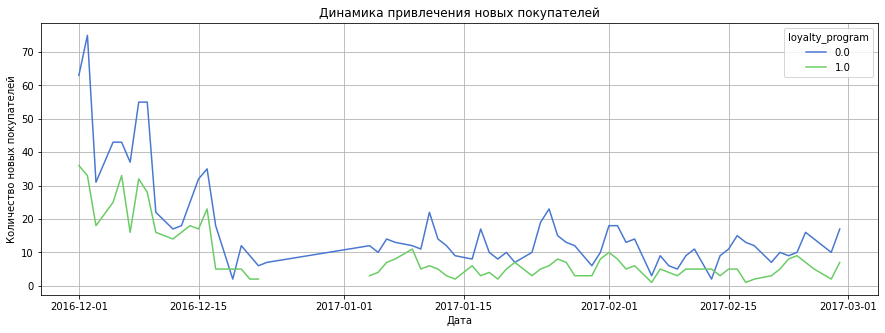

In [40]:
# Построим график, отображающий динамику привлечения новых покупателей, участвующих и не учатвующих в программе лояльности. Применим метод plot():

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='loyalty_program',  # участвует или нет в программе
    values='customer',  # покупатели
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество новых покупателей')

plt.title('Динамика привлечения новых покупателей')
plt.show()

Динамики очень похожи, видно, что по программе лояльности  с  20 декабря 2016 по 3 января 2017 не было ни одного нового покупателя. 
С начала  и до середины декабря наблюдается резкое падение новых покупателей, потом с первых чисел января слегка оживает картина и далее наблюдается колебание в коридоре от 3 до 13 новых покупателей, не участвующих в програме лояльности и от 1 до 10 новых покупателей, участвующих в пограмме лояльности.


##### Когортный анализ по участвующим в программе и нет

In [41]:
by_program = profiles.groupby('loyalty_program').agg({'customer': 'nunique'})
by_program['%']= round(by_program['customer']*100/by_program['customer'].sum(),1)
display(by_program)

,customer,%
loyalty_program,,
0.0,1163,66.5
1.0,587,33.5


Как мы видим 33,5% участвуют в программе, но большая часть нет.

#### Расчет ритейл-метрик

##### Расчет среднего чека и среднего количесва покупок в чеке

На основании имеющихся у нас данных мы сможем рассчитать средний чек и среднее количество товара в чеке 

In [42]:
# посчитаем всего за период средний чек и среднее количество товара в чеке у участвующих и не участвующий в программе лояльности покупателей
loyalty = (
    data_final_grouped.groupby('loyalty_program', as_index=False)
    .agg({'quantity': 'mean', 'sales': 'mean'})
    
)

display(loyalty)

,loyalty_program,quantity,sales
0,0.0,167.188732,409.806504
1,1.0,170.158482,426.360510


Как мы видим среднее количество товара в чеке у покупателей, входящих в программу лояльности на почти 2% выше, а сумма среднего чека выше на 4%

In [43]:
# посчитаем по дням средний чек и среднее количество товара в чеке у участвующих и не у
loyalty_per_day = (
    data_final_grouped.groupby(['loyalty_program','day'], as_index=False)
    .agg({'quantity': 'mean', 'sales': 'mean', 'purchase':'count'})
)

display(loyalty_per_day.head())

,loyalty_program,day,quantity,sales,purchase
0,0.0,2016-12-01,198.159574,580.681277,94
1,0.0,2016-12-02,87.366337,93.167673,101
2,0.0,2016-12-03,123.831325,367.712048,83
3,0.0,2016-12-05,126.782609,366.630000,69
4,0.0,2016-12-06,125.280899,345.313764,89


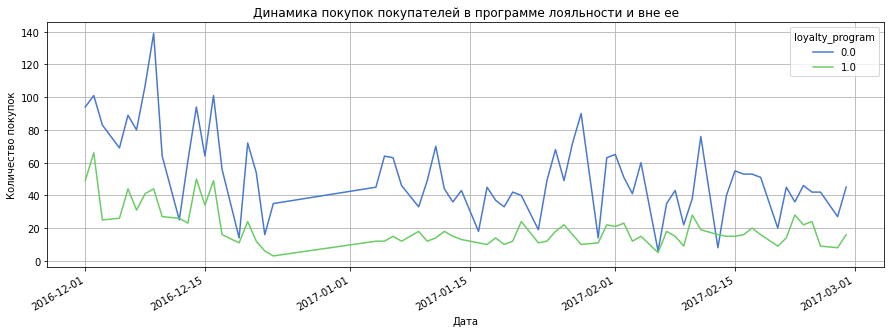

In [44]:
# Построим график, отображающий динамику количества покупок покупателей, участвуюзих и не учатвующих в программе лояльности. Применим метод plot():

loyalty_per_day.pivot_table(
    index='day',  
    columns='loyalty_program',  
    values='purchase'
).plot(figsize=(15, 5), grid=True)
plt.xlabel('Дата')
plt.ylabel('Количество покупок')

plt.title('Динамика покупок покупателей в программе лояльности и вне ее')
plt.show()

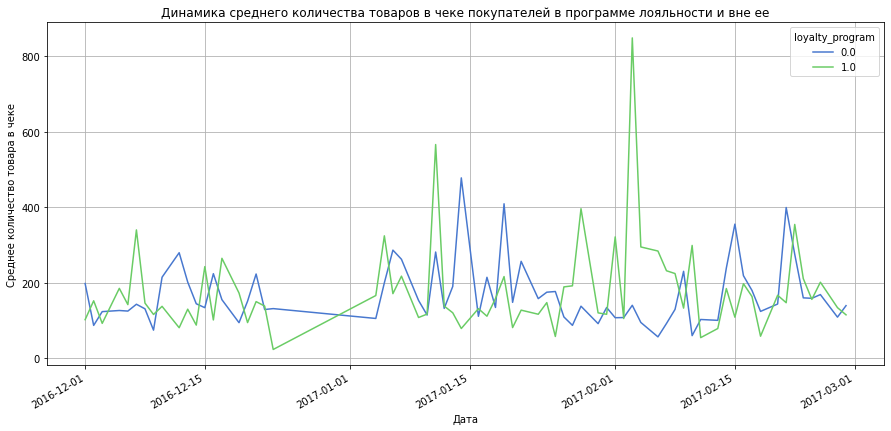

In [45]:
# Построим график, отображающий динамику среднего количества товаров в чеке у покупателей, участвуюзих и не учатвующих в программе лояльности. Применим метод plot():

loyalty_per_day.pivot_table(
    index='day',  
    columns='loyalty_program',  
    values='quantity'
).plot(figsize=(15, 7), grid=True)
plt.xlabel('Дата')
plt.ylabel('Среднее количество товара в чеке')

plt.title('Динамика среднего количества товаров в чеке покупателей в программе лояльности и вне ее')
plt.show()

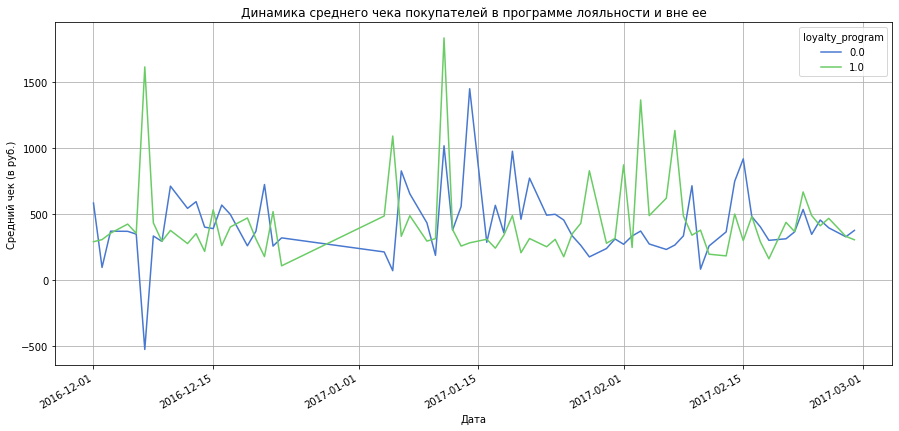

In [46]:
# Построим график, отображающий динамику среднего чека покупателей, участвуюзих и не учатвующих в программе лояльности. Применим метод plot():

loyalty_per_day.pivot_table(
    index='day',  
    columns='loyalty_program',  
    values='sales'
).plot(figsize=(15,7), grid=True)
plt.xlabel('Дата')
plt.ylabel('Средний чек (в руб.)')

plt.title('Динамика среднего чека покупателей в программе лояльности и вне ее')
plt.show()

__Как мы видим на вышеприведенных графиках:
 - количество покупок, совершаемых покупателями, не входящими в программу лояльности, выше чем входящих за исключением пары дней, но колебания очень похожи
 - но и амплитуда колебаний по количеству покупок у покупателей вне программы гораздо выше,
 - в целом за период среднее количеств товара в чеке у покупателей в программе выше на 2%, если посмотреть по дням, то наблюдается некая цикличность, и пиковые значения (например 2 февраля), которые говорят о крупных покупках покупателей по программе лояльности, что и влияет на общие цифры. Но при этом после пиковых покупок наблюдаются периоды затишья, когда в течение долгого периода времени сренее количество товаров в чеке у покупателей, не входящих в програму лояльности выше.
 - динамика среднего чека вцелом похожа на динамику среднего количества, и так же после крупных покупоку покупателей по программе лояльности натупает некий спад, наблюдаются пиковые покупки (если судить по среднему чеку) в первые полторы недели месяца, потом в середине месяца средний чек по покупателям вне пограммы лояльности становится выше и опять ближе к конце месяца наблюдается рост среднего чека по покупателям в программе.

##### Расчет коэффициента повторных покупок (RPR)

In [47]:
display(data_final_grouped.head())

,purchase,customer,day,shop,quantity,sales,loyalty_program
0,536365,23529.0,2016-12-01,Shop 0,33,186.515,1.0
1,536366,23529.0,2016-12-01,Shop 0,10,19.750,1.0
2,536367,18726.0,2016-12-01,Shop 0,71,285.395,0.0
3,536368,18726.0,2016-12-01,Shop 0,11,96.090,0.0
4,536369,18726.0,2016-12-01,Shop 0,2,13.200,0.0


In [48]:
# Посчитаем среднее количество покупок, совершаемых покупателями, участвующих в прогрумме лояльности и нет
# для более точного подсчета уберем пользователей, который нельзя идентифицировать

purchase_user = data_final_grouped[data_final_grouped['customer']!=0].groupby(['loyalty_program','customer'], as_index=False).agg({'purchase':'count'}).reset_index()
RPR=purchase_user.groupby('loyalty_program').agg({'purchase':'mean'})

display(RPR)

,purchase
loyalty_program,
0.0,2.411360
1.0,2.289608


__Как мы видим пользователи, не участвующие в программе лояльности чуть чаще совершают повторные покупки - примерно на 5,3%.

In [49]:
data_final_grouped.head()
data_final_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase         4894 non-null   object        
 1   customer         4894 non-null   float64       
 2   day              4894 non-null   datetime64[ns]
 3   shop             4894 non-null   object        
 4   quantity         4894 non-null   int64         
 5   sales            4894 non-null   float64       
 6   loyalty_program  4894 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 267.8+ KB


##### Расчет пожизненной ценности клиента LTV

In [50]:
# функция для создания пользовательских профилей

def get_profiles(data_final_grouped, dimensions=[]):

    # находим параметры первых посещений
    profiles = (
        data_final_grouped.sort_values(by=['customer', 'day'])
        .groupby(['customer'])
        .agg({'day': 'first', 'loyalty_program':'first'})
        .rename(columns={'day': 'first'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first'].dt.date
    profiles['month'] = profiles['first'].astype('datetime64[M]')

   
    return profiles

In [51]:
profiles = get_profiles(data_final_grouped)
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer         1750 non-null   float64       
 1   first            1750 non-null   datetime64[ns]
 2   loyalty_program  1750 non-null   float64       
 3   dt               1750 non-null   object        
 4   month            1750 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 68.5+ KB
None


In [52]:
sales_per_day=data_final.groupby(['customer','day','loyalty_program']).agg({'sales': 'sum'})
sales_per_day = sales_per_day.reset_index()
sales_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer         3659 non-null   float64       
 1   day              3659 non-null   datetime64[ns]
 2   loyalty_program  3659 non-null   float64       
 3   sales            3659 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 114.5 KB


In [53]:
# преобразуем данные о времени
profiles['dt'] = pd.to_datetime(profiles['dt']).dt.date
profiles['first'] = pd.to_datetime(profiles['first'])
data_final_grouped['day'] = pd.to_datetime(data_final_grouped['day'])
sales_per_day['day'] = pd.to_datetime(sales_per_day['day'])

In [54]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2017, 2, 28).date()
horizon_days = 14

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [55]:
# напишем функцию для расчёта LTV 

def get_ltv(
    profiles,
    data_final_grouped,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

   # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
        
      # исключаем пользователей, пришедших после максимальной даты привлечения
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')  
     
    # присоединяем дату покупки и сумму к профилям по столбцу customer

    result_raw = result_raw.merge(sales_per_day[['customer', 'day','sales']], on='customer', how='left')

    # вычисляем лайфтайм для каждой сессии в днях

    result_raw['lifetime'] = (result_raw['day'] - result_raw['first']).dt.days

        
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(result_raw, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = result_raw.pivot_table(
            index=dims, columns='lifetime', values='sales', aggfunc='sum',
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
             result_raw.groupby(dims)
            .agg({'customer': 'nunique'})
            .rename(columns={'customer': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # возвращаем таблицы LTV 
        return result

    # получаем таблицы LTV 
    result_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV 
    result_in_time = group_by_dimensions(
        result_raw, dimensions+['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time



In [56]:
# исключаем пользователей, не «доживших» до горизонта анализа
last_suitable_acquisition_date = observation_date
if not ignore_horizon:
    last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    # исключаем пользователей, пришедших после максимальной даты привлечения
result_raw = profiles.query('dt <= @last_suitable_acquisition_date')  
     
    # присоединяем дату покупки и сумму к профилям по столбцу customer

result_raw = result_raw.merge(sales_per_day[['customer', 'day','sales']], on='customer', how='left')

    # вычисляем лайфтайм для каждой сессии в днях

result_raw['lifetime'] = (result_raw['day'] - result_raw['first']).dt.days
result_raw

,customer,first,loyalty_program,dt,month,day,sales,lifetime
0,0.0,2016-12-01,0.0,2016-12-01,2016-12-01,2016-12-01,5272.365,0
1,0.0,2016-12-01,0.0,2016-12-01,2016-12-01,2016-12-02,269.945,1
2,0.0,2016-12-01,0.0,2016-12-01,2016-12-01,2016-12-03,9013.010,2
3,0.0,2016-12-01,0.0,2016-12-01,2016-12-01,2016-12-05,0.000,4
4,0.0,2016-12-01,0.0,2016-12-01,2016-12-01,2016-12-06,9131.005,5
...,...,...,...,...,...,...,...,...
3454,23948.0,2016-12-08,1.0,2016-12-08,2016-12-01,2016-12-16,-32.200,8
3455,23956.0,2017-01-25,1.0,2017-01-25,2017-01-01,2017-01-25,-25.470,0
3456,23962.0,2017-01-06,1.0,2017-01-06,2017-01-01,2017-01-06,12.520,0
3457,23962.0,2017-01-06,1.0,2017-01-06,2017-01-01,2017-01-23,39.160,17


In [57]:
# функция для сглаживания фрейма

def filter_data(data_final_grouped, window):
    # для каждого столбца применяем скользящее среднее
    for column in data_final_grouped.columns.values:
        data_final_grouped[column] = data_final_grouped[column].rolling(window).mean() 
    return data_final_grouped 

In [58]:
# функция для визуализации LTV 

def plot_ltv(ltv, ltv_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]


    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [59]:
#ltv_grouped

In [60]:
#ltv_history.head()

In [61]:
#ltv_history.drop(columns=['cohort_size'])[[horizon_days - 1]].head()

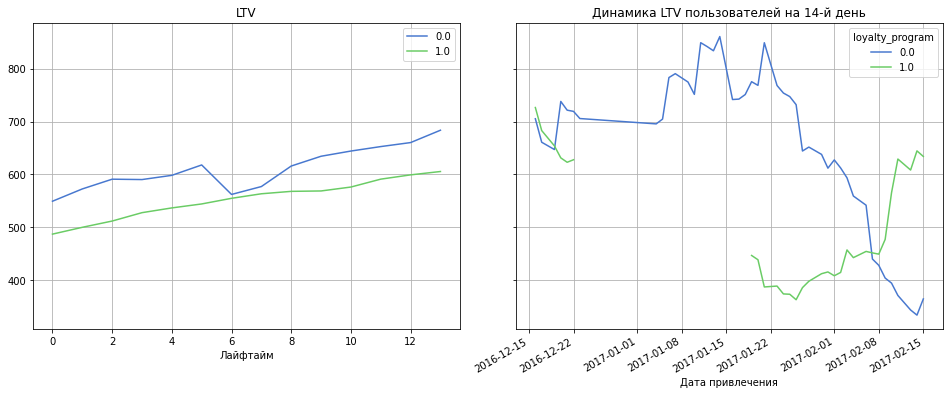

In [62]:
# смотрим ltv с разбивкой по покупателям в программе и вне 

dimensions = ['loyalty_program']

ltv_raw, ltv_grouped, ltv_history = get_ltv(
    profiles, data_final_grouped, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv(ltv_grouped, ltv_history, horizon_days, window=14)

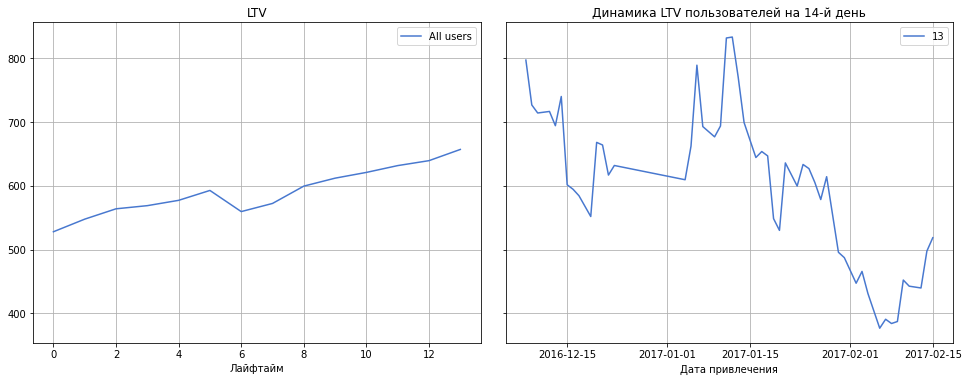

In [63]:
# считаем LTV 
ltv_raw, ltv_grouped, ltv_history = get_ltv(
    profiles, data_final_grouped, observation_date, horizon_days
)

# строим графики
plot_ltv(ltv_grouped, ltv_history, horizon_days) 

__Мы видим, что LTV чуть лучше у покупателей, не входящих в программу, по ним наблюдается проседание на 6 день, но в остальное время LTV по покупателям в программе лояльности и вне ее идут практически параллельно.
_ А вот в динамике мы видим не очень хорошую динамику LTV на 14й день по покупателям вне программы, показывая небольщой рост в период с 15 декабря 2016 года по 22 января 2017 года, а далее  наблюдается резкое падение с обновлением минимальных значений
__По покупателям, входящим в программу лояльности мы видим падение  LTV на 14й день в первую неделю, далее отсутствие данных в период с 22 декабря 2016 года, данные появлюются с большим гэпом вниз 18 января 2017 года а с 25 января 2017 года показывают хороший рост. Рост настолько хорош, что перекрывает падение по покупателям вне группы - что наглядно демонстрируют графики.

### Шаг 5. Проверка статистических гипотез

#### Проверка статестической гиппотезы о влиянии программы лояльности на средний чек

In [64]:
# переименуем для наглядности данные в столбце по входящим и нет в программу лояльности: А - не входят, В - входят.
data_final_grouped['loyalty_program'] = data_final_grouped['loyalty_program'].apply(lambda x: 'A' if x==0 else 'B')

##### Сформулируем гипотезы

    Зададим критический уровень статистической значимости alpha = .05.
    Используем напараметрический тест Уилкоксона-Манна-Уитни

    Сформулируем нулевую гипотезу:

Н0 - статистически значимых различий в среднем чеке между сегментами А и В нет

    Сформулируем альтернативную гипотезу:

Н1 - статистически значимые различия в среднем чеке заказов между сегментами А и В есть


In [65]:
# найдём относительные различия в среднем чеке между группами.
print('{0:.3f}'.format(stats.mannwhitneyu(data_final_grouped[data_final_grouped['loyalty_program']=='A']['sales'], data_final_grouped[data_final_grouped['loyalty_program']=='B']['sales'])[1]))
print('{0:.3f}'.format(data_final_grouped[data_final_grouped['loyalty_program']=='B']['sales'].mean()/data_final_grouped[data_final_grouped['loyalty_program']=='A']['sales'].mean()-1))

0.002
0.040


P-value значительно меньше 0.05 (p-value=0.002), значит нулевую гипотезу отвергаем и считаем, что в среднем чеке нет различий по покупателям входящим и не входящим в программу лояльности.
Мы видим, что средний чек группы B (покупателей, входящих в программу лояльности) незначительно выше среднего чека группы A (покупателей, не входящих в программу лояльности)  - всего на 4%).

#### Проверка статестической гиппотезы о влиянии программы лояльности на количество продуктов в покупательской корзине

##### Сформулируем гипотезы

    Зададим критический уровень статистической значимости alpha = .05.
    Используем напараметрический тест Уилкоксона-Манна-Уитни

    Сформулируем нулевую гипотезу:

Н0 - статистически значимых различий в среднем количестве товаров в чеке между сегментами А и В нет

    Сформулируем альтернативную гипотезу:

Н1 - статистически значимые различия в среднем количестве товаров в чеке между сегментами А и В есть


In [66]:
# найдём относительные различия в среднем количестве товаров в чеке между группами.
print('{0:.5f}'.format(stats.mannwhitneyu(data_final_grouped[data_final_grouped['loyalty_program']=='A']['quantity'], data_final_grouped[data_final_grouped['loyalty_program']=='B']['quantity'])[1]))
print('{0:.3f}'.format(data_final_grouped[data_final_grouped['loyalty_program']=='B']['quantity'].mean()/data_final_grouped[data_final_grouped['loyalty_program']=='A']['quantity'].mean()-1))

0.00020
0.018


P-value значительно меньше 0.05 (p-value=0.0002), значит нулевую гипотезу отвергаем и считаем, что по среднему количеству товаров в чеке  нет различий по покупателям входящим и не входящим в программу лояльности.
Мы видим, что средний чек группы B (покупателей, входящих в программу лояльности) незначительно выше среднего чека группы A (покупателей, не входящих в программу лояльности)  - всего на 1,8%).

### Шаг 6. Выводы и рекомендации

- Анализ проводился за период с 01 декабря 2016 года по 28 февраля 2017 года (3 месяца). 
 - Были проанализированы 587 пользователей, участвующих в программе лояльности и совершивших 23412 операций, и 1162 пользователей, не участвующих в программе лояльности и совершивших 80890 операций. Стоит отметить тот факт, что 36210 операций было совершено неавторизированными пользователями. Т.е. в программе участвует около трети покупателей.
- Отсутствуют данные или продажи за период с 22 декабря 2016 года по 3 января 2017 года, что может значительно повлиять на правильность выводов.
- Динамики привлечения новых покупателей очень походи для покупателей в программе и вне
 
- Количество продаж в декабре значительно превышает январский уровень.
- Пользователи, не участвующие в программе лояльности чуть чаще совершают повторные покупки - примерно на 5,3%.
- Среднее количество товара в чеке у покупателей, входящих в программу лояльности на почти 2% выше, а сумма среднего чека выше на 4%.
- LTV чуть лучше у покупателей, не входящих в программу, по ним наблюдается проседание на 6 день, но в остальное время LTV по покупателям в программе лояльности и вне ее идут практически параллельно. 
- А вот в динамике мы видим не очень хорошую динамику LTV на 14й день по покупателям вне программы, показывая небольшой рост в период с 15 декабря 2016 года по 22 января 2017 года, а далее наблюдается резкое падение с обновлением минимальных значений.
- По покупателям, входящим в программу лояльности мы видим падение LTV на 14й день в первую неделю, далее отсутствие данных в период с 22 декабря 2016 года, данные появляются с большим гэпом вниз 18 января 2017 года, а с 25 января 2017 года показывают хороший рост. Рост настолько хорош, что перекрывает падение по покупателям вне группы - что наглядно демонстрируют графики.
- Проверка статистических гипотез показала, что:
-- в среднем чеке нет различий по покупателям входящим и не входящим в программу лояльности. Мы видим, что средний чек группы B (покупателей, входящих в программу лояльности) незначительно выше среднего чека группы A (покупателей, не входящих в программу лояльности) - всего на 4%);
--среднему количеству товаров в чеке нет различий по покупателям входящим и не входящим в программу лояльности. Мы видим, что средний чек группы B (покупателей, входящих в программу лояльности) незначительно выше среднего чека группы A (покупателей, не входящих в программу лояльности) - всего на 1,8%).
  

__Рекомендации:
На основании результатов анализов и проверенных статистических гипотез можно порекомендовать изменить программу лояльности.
Как мы видим, ни одна из ритейл-метрик не показала значительных успехов программы лояльности.
Необходимо проанализировать изменения, произошедшие 25 января 2017 года, повлекшие резкое улучшение LTV по покупателям, входящим в программу лояльности, возможно применение их в дальнейшем могли бы положительно сказаться на эффективности программы лояльности.
Возможно, стоит проанализировать данные за 3 месяца с 25 января 2017 года, чтобы проверить изменились ли показатели по ритейл-метрикам, но на данный момент это невозможно ввиду слишком короткого периода (чуть более месяца). 


### Шаг 7. Презентация

Ссылка на презентацию

https://disk.yandex.ru/i/K9yx5uC5wFmxRw

### Шаг 8. Создание дашборда

In [67]:
# выгрузим файл для построение графиков в tableau

loyalty_per_day.to_csv('loyalty_per_day.csv', index = False)

loyalty_per_day.head(5) 

,loyalty_program,day,quantity,sales,purchase
0,0.0,2016-12-01,198.159574,580.681277,94
1,0.0,2016-12-02,87.366337,93.167673,101
2,0.0,2016-12-03,123.831325,367.712048,83
3,0.0,2016-12-05,126.782609,366.630000,69
4,0.0,2016-12-06,125.280899,345.313764,89


 Ссылка на дашборд

https://public.tableau.com/authoring/Final_project_16714784142990/Sheet5#1